In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
school = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/school_census.csv",index_col=0)
school = school[(school["n_classes"] > 0) & (school["admin_type"] != 4.0)]
census = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/access_df.csv", index_col=0)

In [3]:
# Create percentage statistics
census.rename({"n_people_15to17acc":"n_people_15to17"}, axis=1, inplace=True)
census["pct_black"] = census["n_people_15to17_black"]/census["n_people_15to17"]
census["pct_white"] = census["n_people_15to17_white"]/census["n_people_15to17"]
census["pct_indigenous"] = census["n_people_15to17_indigenous"]/census["n_people_15to17"]
census["pct_pardos"] = census["n_people_15to17_parda"]/census["n_people_15to17"]
census["pct_asian"] = census["n_people_15to17_asian"]/census["n_people_15to17"]
census["pct_men"] = (census["n_people_15_men"] + census["n_people_16_men"] + census["n_people_17_men"])/census["n_people_15to17"]

# Rename zone values to urban and rural
census["zone"] = census["zone"].replace({1.0:"urban", 2.0:"rural"})
# One-hot encoding zone
census = pd.get_dummies(census, columns=["zone"])

# creating region variable (South, Southeast, Northeast, Midwest, North)
census["region"] = census["state"].replace({"AC":"North", "AL":"Northeast", "AM":"North", "AP":"Northeast", "BA":"Northeast", "CE":"Northeast", "DF":"Midwest", "ES":"Southeast", "GO":"Midwest", "MA":"Northeast", "MG":"Southeast", "MS":"Midwest", "MT":"Midwest", "PA":"North", "PB":"Northeast", "PE":"Northeast", "PI":"Northeast", "PR":"South", "RJ":"Southeast", "RN":"Northeast", "RO":"North", "RR":"North", "RS":"South", "SC":"South", "SE":"Northeast", "SP":"Southeast","SP1":"Southeast","SP2":"Southeast", "TO":"North"})
# One-hot encoding region
census = pd.get_dummies(census, columns=["region"])

#creating a variable for whether the census average monthly income is below the poverty line of R$ 406.00 (below/above)
census["fpl"] = census["avg_monthly_earnings"].apply(lambda x: "below" if x < 406 else "above")
# One-hot encoding fpl
census = pd.get_dummies(census, columns=["fpl"])

In [4]:
len(census)

301567

(array([1.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 8.000e+00, 1.500e+01,
        1.500e+01, 7.600e+01, 8.100e+01, 1.030e+02, 3.780e+02, 2.670e+02,
        5.020e+02, 3.730e+02, 1.474e+03, 6.890e+02, 7.750e+02, 1.779e+03,
        9.120e+02, 1.009e+03, 1.388e+03, 2.306e+03, 9.970e+02, 9.730e+02,
        9.180e+02, 1.869e+03, 6.770e+02, 5.630e+02, 7.830e+02, 2.960e+02,
        2.160e+02, 1.880e+02, 2.610e+02, 9.400e+01, 8.600e+01, 1.270e+02,
        4.400e+01, 4.900e+01, 3.700e+01, 6.800e+01, 2.400e+01, 1.800e+01,
        2.700e+01, 9.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([1.3  , 1.428, 1.556, 1.684, 1.812, 1.94 , 2.068, 2.196, 2.324,
        2.452, 2.58 , 2.708, 2.836, 2.964, 3.092, 3.22 , 3.348, 3.476,
        3.604, 3.732, 3.86 , 3.988, 4.116, 4.244, 4.372, 4.5  , 4.628,
        4.756, 4.884, 5.012, 5.14 , 5.268, 5.396, 5.524, 5.652, 5.78 ,
        5.908, 6.036, 6.164, 6.292, 6.42 , 6.548, 6.676, 6.804, 6.932,
        7.06 , 7.188,

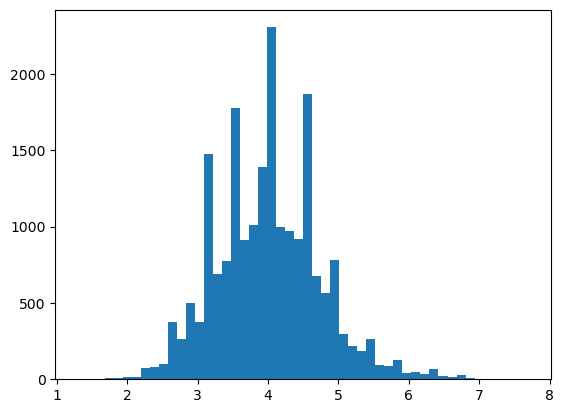

In [5]:
# hist of school quality
plt.hist(school["ideb_filled"], bins=50)

## Summary Statistics

In [6]:
print_name = {
    "n_teachers":"Number of teachers",
    "n_students":"Number of students",
    "n_classes":"Number of classes",
    "mod_3sfca_n_classes": "Accessibility",
    "Q_n_classes": "Quality",
    "Q_adj_3sfca": "Quality-adjusted Accessibility",
    "avg_monthly_earnings": "Monthly Income (R$)",
    "density": "Density (people/km^2)",
    "pct_white": "% White",}

### Census Tracts

In [7]:
# Making a dataframe containing summary statistics

columns = {
    "n_households":"Number of households",
    "n_people":"Number of people", 
    "avg_monthly_earnings":"Average Monthly Earnings",
    "n_people_15to17": "Number of people aged 15 to 17",
    "pct_black": "Percentage black",
    "pct_white": "Percentage white",
    "pct_indigenous": "Percentage indigenous",
    "pct_pardos": "Percentage pardos",
    "pct_asian": "Percentage asian",
    "pct_men": "Percentage male"}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


df_summary = census[columns.keys()].describe().transpose()[metrics.keys()]

df_summary.rename(index=columns, columns=metrics, inplace=True)
df_summary



Mean      Std.Dev
Number of households             189.712075    99.753575
Number of people                 628.164596   344.438378
Average Monthly Earnings        1230.670235  1353.528070
Number of people aged 15 to 17    34.276330    22.542783
Percentage black                   0.067868     0.093036
Percentage white                   0.474209     0.274176
Percentage indigenous              0.007208     0.073547
Percentage pardos                  0.440494     0.253670
Percentage asian                   0.010207     0.030482
Percentage male                    0.506578     0.127939

In [8]:
df_summary.to_latex("summary.tex")

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_26818/237270451.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_summary.to_latex("summary.tex")


In [9]:
columns = {
    "mod_3sfca_n_classes": "A",
    "Q_n_classes": "Q",
    "Q_adj_3sfca": "H",}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


df_summary = census[columns.keys()].describe().transpose()[metrics.keys()]

df_summary.rename(index=columns, columns=metrics, inplace=True)
df_summary

Mean   Std.Dev
A  0.019683  0.017421
Q  4.029765  0.577148
H  0.079538  0.061605

In [10]:
# Count how many rows have geometry equal to school["geometry"][0]
# school["geometry"][0]
census[census["geometry"] == 'GEOMETRYCOLLECTION EMPTY'].count()

3sfca_n_classes                 0
e2sfca_n_classes                0
state                          28
n_households                   28
n_people                       28
avg_monthly_earnings           28
n_people_15to17_white          28
n_people_15to17_black          28
n_people_15to17_asian          28
n_people_15to17_parda          28
n_people_15to17_indigenous     28
n_people_15                    28
n_people_16                    28
n_people_17                    28
n_people_15_men                28
n_people_16_men                28
n_people_17_men                28
n_people_15_women              28
n_people_16_women              28
n_people_17_women              28
n_people_15to17dem             28
n_people_15to17_alternative    28
state_id                        2
state_abbrev                    2
city_id                         2
city_name                       2
district_id                     2
district_name                   2
subdistrict_id                  2
subdistrict_na

In [11]:
# Average number of students per classroom
print("Average number of students per classroom: ", school["n_students"].sum() / school["n_classes"].sum())

Average number of students per classroom:  30.79513771063335


### Schools

In [12]:
school = school[(school["n_classes"] > 0) & (school["admin_type"] != 4.0)]
school["capacity"] = 35*school["n_classes"]

In [13]:
columns = {
    "n_teachers":"Number of teachers",
    "n_students":"Number of students",
    "capacity":"Estimated capacity",
    "ideb_filled":"Quality"}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


school_summary = school[columns.keys()].describe().transpose()[metrics.keys()]

school_summary.rename(index=columns, columns=metrics, inplace=True)
school_summary

Mean     Std.Dev
Number of teachers    8.404181   13.446329
Number of students  323.161171  289.465090
Estimated capacity  367.286585  289.079604
Quality               4.010585    0.746204

In [14]:
school.columns

Index(['region_name', 'region_id', 'state_name', 'state_abbrev', 'state_id',
       'city_name', 'city_id', 'mesoregion_name', 'mesoregion_id',
       'microregion_name', 'microregion_id', 'sector_id', 'school_id',
       'school_name', 'admin_type', 'location_type', 'address',
       'address_number', 'address_complement', 'neighborhood', 'zip_code',
       'QT_MAT_INF', 'QT_MAT_FUND', 'n_students', 'n_teachers', 'n_classes',
       'sigla_uf', 'geometry', 'ideb_school', 'saeb_school',
       'output_indicator_school', 'ideb_city', 'saeb_city',
       'output_indicator_city', 'ideb_state', 'saeb_state',
       'output_indicator_state', 'ideb_filled', 'capacity'],
      dtype='object')

In [15]:
school.describe()

region_id      state_id       city_id  mesoregion_id  \
count  20500.000000  20500.000000  2.050000e+04   20500.000000   
mean       2.881659     32.231366  3.239461e+06    3228.484878   
std        1.071267      9.872547  9.897297e+05     988.012521   
min        1.000000     11.000000  1.100015e+06    1101.000000   
25%        2.000000     26.000000  2.604106e+06    2602.000000   
50%        3.000000     33.000000  3.301702e+06    3304.000000   
75%        4.000000     41.000000  4.101804e+06    4101.000000   
max        5.000000     53.000000  5.300108e+06    5301.000000   

       microregion_id     sector_id     school_id    admin_type  \
count    20500.000000  2.050000e+04  2.050000e+04  20500.000000   
mean     32252.556146  3.239461e+08  3.236884e+07      1.979707   
std       9875.911680  9.897298e+07  9.871519e+06      0.194259   
min      11001.000000  1.100015e+08  1.100026e+07      1.000000   
25%      26005.000000  2.604106e+08  2.604306e+07      2.000000   
50%      33009.000000  3.301702e+08  3.303018e+07      2.000000   
75%      41002.250000  4.101804e+08  4.100937e+07      2.000000   
max      53001.000000  5.300108e+08  5.306818e+07      3.000000   

       location_type      zip_code  ...   saeb_school  \
count   20500.000000  2.050000e+04  ...  12007.000000   
mean        1.142537  5.202654e+07  ...      4.659987   
std         0.349608  2.762400e+07  ...      0.673165   
min         1.000000  1.107000e+06  ...      1.951648   
25%         1.000000  2.846000e+07  ...      4.217778   
50%         1.000000  5.749500e+07  ...      4.641431   
75%         1.000000  7.580038e+07  ...      5.051461   
max         2.000000  9.999000e+07  ...      7.774514   

       output_indicator_school     ideb_city     saeb_city  \
count             18382.000000  19505.000000  19505.000000   
mean                  0.863346      3.973043      4.592582   
std                   0.104174      0.612192      0.470498   
min                   0.153759      1.700000      2.236053   
25%                   0.801534      3.500000      4.303865   
50%                   0.883158      4.000000      4.632232   
75%                   0.946439      4.500000      4.900008   
max                   1.000000      6.500000      6.981192   

       output_indicator_city    ideb_state    saeb_state  \
count           20430.000000  20500.000000  20500.000000   
mean                0.860514      3.953376      4.563758   
std                 0.080553      0.419259      0.300263   
min                 0.426798      3.200000      3.930724   
25%                 0.813431      3.600000      4.348177   
50%                 0.868636      4.000000      4.708547   
75%                 0.921999      4.300000      4.763683   
max                 1.000000      4.700000      5.046128   

       output_indicator_state   ideb_filled      capacity  
count            20500.000000  20500.000000  20500.000000  
mean                 0.861822      4.010585    367.286585  
std                  0.055279      0.746204    289.079604  
min                  0.766159      1.300000     35.000000  
25%                  0.809010      3.500000    175.000000  
50%                  0.862818      4.000000    315.000000  
75%                  0.910656      4.500000    455.000000  
max                  0.947212      7.700000   5740.000000  

[8 rows x 26 columns]

In [16]:
# count if geomtry is 'GEOMETRYCOLLECTION EMPTY'
school[school["geometry"] == 'GEOMETRYCOLLECTION EMPTY'].count()

region_name                2023
region_id                  2023
state_name                 2023
state_abbrev               2023
state_id                   2023
city_name                  2023
city_id                    2023
mesoregion_name            2023
mesoregion_id              2023
microregion_name           2023
microregion_id             2023
sector_id                  2023
school_id                  2023
school_name                2023
admin_type                 2023
location_type              2023
address                    2023
address_number             1663
address_complement          485
neighborhood               1781
zip_code                   2023
QT_MAT_INF                 2023
QT_MAT_FUND                2023
n_students                 2023
n_teachers                 2022
n_classes                  2023
sigla_uf                   1990
geometry                   2023
ideb_school                 823
saeb_school                 823
output_indicator_school    1445
ideb_cit

# Access and Quality by Subgroups

In [17]:


import math

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def weighted_average(df, value, weight):
    val = df[value]
    wt = df[weight]
    return (val * wt).sum() / wt.sum()
    
def subgroup_averages(df, subgroups):
    averages = {}
    for subgroup in subgroups:
        averages[subgroup] = [weighted_average(df, "3sfca_n_classes", subgroup), weighted_average(df, "mod_3sfca_n_classes", subgroup), weighted_average(df, "Q_n_classes", subgroup), weighted_average(df, "Q_adj_3sfca", subgroup)]
    
    return pd.DataFrame(averages, index=["Old Access", "Access", "Quality", "Quality-Adjusted Access"]) 


In [18]:
subgroup_averages(census, ["fpl_below", "fpl_above"])

fpl_below  fpl_above
Old Access                0.011572   0.019378
Access                    0.011583   0.019366
Quality                   2.849434   3.897527
Quality-Adjusted Access   0.043001   0.078791

In [19]:
subgroup_averages(census, ["zone_urban", "zone_rural"])


zone_urban  zone_rural
Old Access                 0.020790    0.010622
Access                     0.020776    0.010627
Quality                    3.989126    3.044151
Quality-Adjusted Access    0.084161    0.042267

In [20]:
subgroup_averages(census, ["n_people_15to17_black", "n_people_15to17_white", "n_people_15to17_indigenous", "n_people_15to17_parda", "n_people_15to17_asian"])


n_people_15to17_black  n_people_15to17_white  \
Old Access                            0.018032               0.019751   
Access                                0.018041               0.019742   
Quality                               3.627485               3.983904   
Quality-Adjusted Access               0.069396               0.081386   

                         n_people_15to17_indigenous  n_people_15to17_parda  \
Old Access                                 0.021677               0.018463   
Access                                     0.021703               0.018469   
Quality                                    2.594963               3.635566   
Quality-Adjusted Access                    0.077145               0.072056   

                         n_people_15to17_asian  
Old Access                            0.018951  
Access                                0.018944  
Quality                               3.749128  
Quality-Adjusted Access               0.075263

In [21]:
subgroup_averages(census, ["region_Northeast", "region_North", "region_South", "region_Southeast", "region_Midwest"])

region_Northeast  region_North  region_South  \
Old Access                       0.014665      0.020884      0.020508   
Access                           0.014662      0.020880      0.020495   
Quality                          3.379786      2.734629      3.934039   
Quality-Adjusted Access          0.055825      0.072604      0.084228   

                         region_Southeast  region_Midwest  
Old Access                       0.019444        0.018969  
Access                           0.019430        0.018965  
Quality                          4.136322        3.589706  
Quality-Adjusted Access          0.081485        0.078989

In [22]:
census["3sfca_n_classes"].mean()

0.019693251382959295

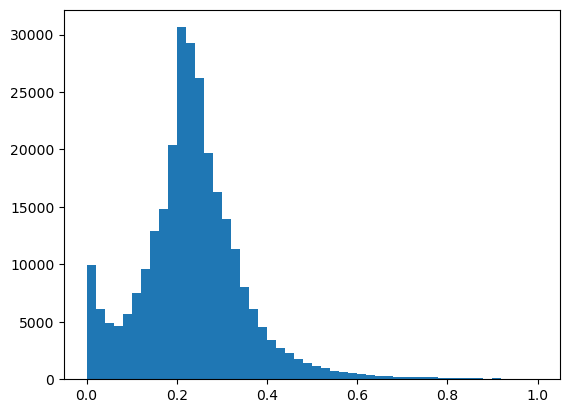

In [23]:
# histogram of q_adj_3sfca
plt.hist(census["Q_adj_3sfca"]*3, bins=50, range=(0, 1))
plt.show()

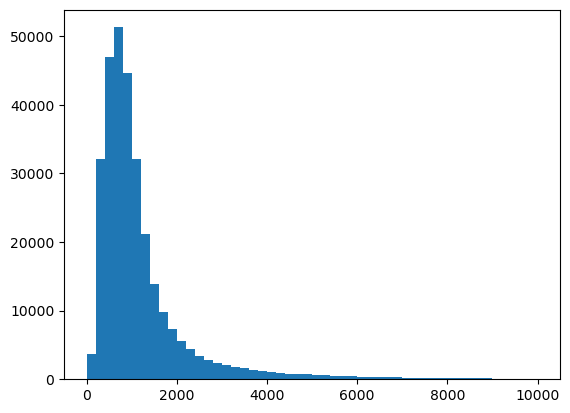

In [24]:
plt.hist(census["avg_monthly_earnings"], bins=50, range=(0, 10000))
plt.show()

# Regressions

In [25]:
census.isna().sum()

3sfca_n_classes                 19571
e2sfca_n_classes                19571
state                               0
n_households                      120
n_people                          120
avg_monthly_earnings              120
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                           26
state_abbrev                       26
city_id                            26
city_name                          26
district_id 

In [26]:
census.columns

Index(['3sfca_n_classes', 'e2sfca_n_classes', 'state', 'n_households',
       'n_people', 'avg_monthly_earnings', 'n_people_15to17_white',
       'n_people_15to17_black', 'n_people_15to17_asian',
       'n_people_15to17_parda', 'n_people_15to17_indigenous', 'n_people_15',
       'n_people_16', 'n_people_17', 'n_people_15_men', 'n_people_16_men',
       'n_people_17_men', 'n_people_15_women', 'n_people_16_women',
       'n_people_17_women', 'n_people_15to17dem',
       'n_people_15to17_alternative', 'state_id', 'state_abbrev', 'city_id',
       'city_name', 'district_id', 'district_name', 'subdistrict_id',
       'subdistrict_name', 'neighborhood_name', 'neighborhood_id', 'geometry',
       'microregion_id', 'microregion_name', 'mesoregion_id',
       'mesoregion_name', 'n_people_15to17', 'mod_3sfca_n_classes',
       'Q_n_classes', 'Q_adj_3sfca', 'pct_black', 'pct_white',
       'pct_indigenous', 'pct_pardos', 'pct_asian', 'pct_men', 'zone_rural',
       'zone_urban', 'region_Midwest',

In [27]:
school[school["region_name"] == "Norte"]["ideb_filled"].mean()

3.433078027764481

## Prepare Data

In [28]:
census.isna().sum()

3sfca_n_classes                 19571
e2sfca_n_classes                19571
state                               0
n_households                      120
n_people                          120
avg_monthly_earnings              120
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                           26
state_abbrev                       26
city_id                            26
city_name                          26
district_id 

In [29]:
# Regression on accessibility metric
import statsmodels.api as sm
import statsmodels.formula.api as smf

# drop rows with missing access values
census_nona = census.dropna(subset=["Q_n_classes", "avg_monthly_earnings"])
print(census_nona.isna().sum())
y = census_nona["Q_adj_3sfca"]
X = census_nona[["pct_black", "pct_indigenous", "pct_pardos", "pct_asian", "pct_men", "avg_monthly_earnings", "zone_rural", "region_Midwest", "region_Northeast", "region_South", "region_North"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

3sfca_n_classes                     0
e2sfca_n_classes                    0
state                               0
n_households                        0
n_people                            0
avg_monthly_earnings                0
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                            0
state_abbrev                        0
city_id                             0
city_name                           0
district_id 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q_adj_3sfca   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2149.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:03:01   Log-Likelihood:             3.9702e+05
No. Observations:              281880   AIC:                        -7.940e+05
Df Residuals:                  281868   BIC:                        -7.939e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0998      0.001    166.761      0.000       0.099       0.101
pct_black               -0.0565      0.001    -44.430      0.000      -0.059      -0.054
pct_indigenous           0.1266      0.002     56.983      0.000       0.122       0.131
pct_pardos              -0.0131      0.001    -20.449      0.000      -0.014      -0.012
pct_asian               -0.0018      0.004     -0.477      0.633      -0.009       0.006
pct_men                 -0.0028      0.001     -3.088      0.002      -0.005      -0.001
avg_monthly_earnings -2.506e-06   9.33e-08    -26.859      0.000   -2.69e-06   -2.32e-06
zone_rural              -0.0304      0.000   -101.015      0.000      -0.031      -0.030
region_Midwest           0.0096      0.000     20.990      0.000       0.009       0.011
region_Northeast        -0.0116      0.000    -36.885      0.000      -0.012      -0.011
region_South             0.0037      0.000     10.480      0.000       0.003       0.004
region_North             0.0122      0.001     22.765      0.000       0.011       0.013
==============================================================================
Omnibus:                  1009250.899   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1854741718785.768
Skew:                          72.127   Prob(JB):                         0.00
Kurtosis:                   12568.697   Cond. No.                     6.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Correlations

In [30]:
# norm_access_df = geo_dem_census_df.set_index("sector_id").join(A.access_df[["e2sfca_n_classes","3sfca_n_classes", "e2sfca_n_teachers", "3sfca_n_teachers"]], how="left")
# sp_df = norm_access_df[norm_access_df["city_name"] == "Araçatuba"]
# plt.scatter(sp_df["3sfca_n_teachers"], sp_df["3sfca_n_classes"], alpha=0.3)
# # set limits on the axes

# plt.xlabel("Teachers")
# plt.ylabel("Classrooms")
# plt.show()

## Maps

In [31]:
import geopandas as gpd
from shapely import wkt
import contextily as cx
# Filter only São Paulo
census_sp = census[census["city_name"] == "São Paulo"]
census_sp = gpd.GeoDataFrame(census_sp, geometry = census_sp["geometry"].apply(wkt.loads), crs = "EPSG:5641")

In [32]:
census_sp["area"] = census_sp["geometry"].area/10**6
census_sp["density"] = census_sp["n_people"]/census_sp["area"]

# Multiplying by 30 to get slots instead of classrooms
census_sp["mod_3sfca_n_classes"] = census_sp["3sfca_n_classes"]*30
census_sp["Q_adj_3sfca"] = census_sp["Q_adj_3sfca"]*3

In [65]:
def plot(v, df = census_sp, ax=None, leg=True, swap_colors=False, edges = None):
    from matplotlib_scalebar.scalebar import ScaleBar

    base = df.plot(
        v,
        scheme = "quantiles",
        legend=leg,
        figsize=(10, 10),
        cmap="RdYlGn" if swap_colors else "OrRd",
        markersize=5,
        alpha=0.8,
        #edgecolor="black",
        legend_kwds={'loc': 'lower right', 'title': print_name[v]}
        #vmin=il_map[v].quantile(0.05),
        #vmax=il_map[v].quantile(0.95),
    )
    # basemap
    #gpd.GeoDataFrame(geometry=[df.geometry.unary_union], crs=df.crs).boundary.plot(ax=base)
    cx.add_basemap(base, crs=df.crs, source=cx.providers.CartoDB.VoyagerNoLabels)
    base.add_artist(ScaleBar(1))

    if edges is not None:
        edges.boundary.plot(ax=base, edgecolor="black", linewidth=1, color = None)
    plt.axis('off')
    #base.set_axis_off()
    


    plt.show()

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


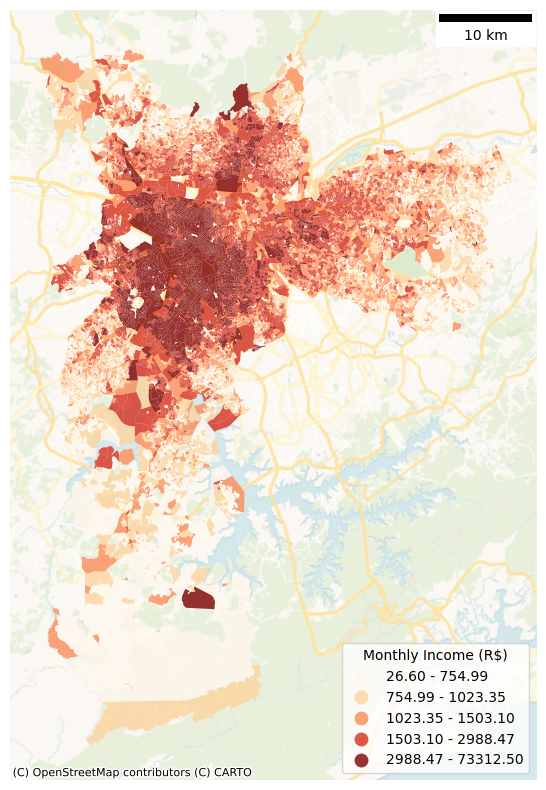

In [77]:
plot("avg_monthly_earnings")

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


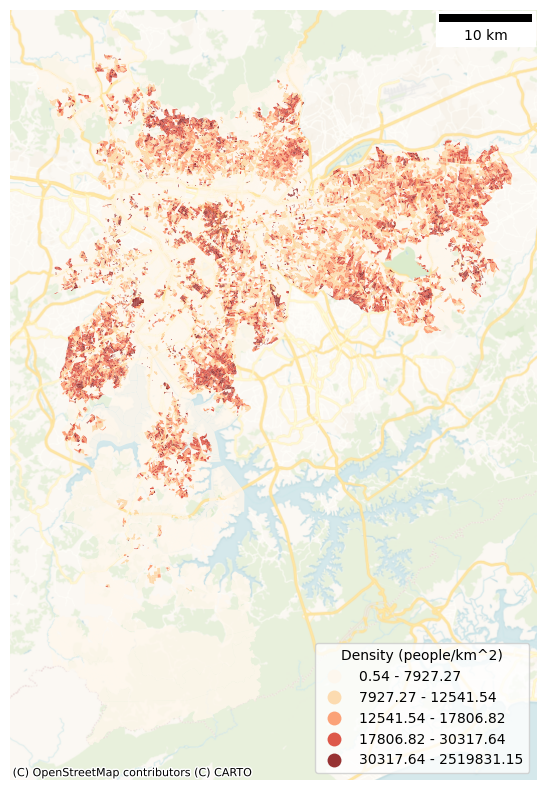

In [76]:
plot("density")

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


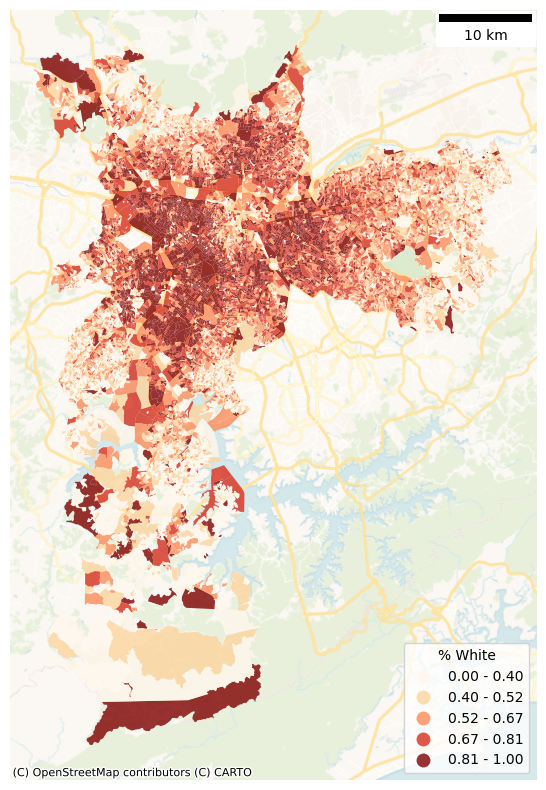

In [75]:
plot("pct_white")

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


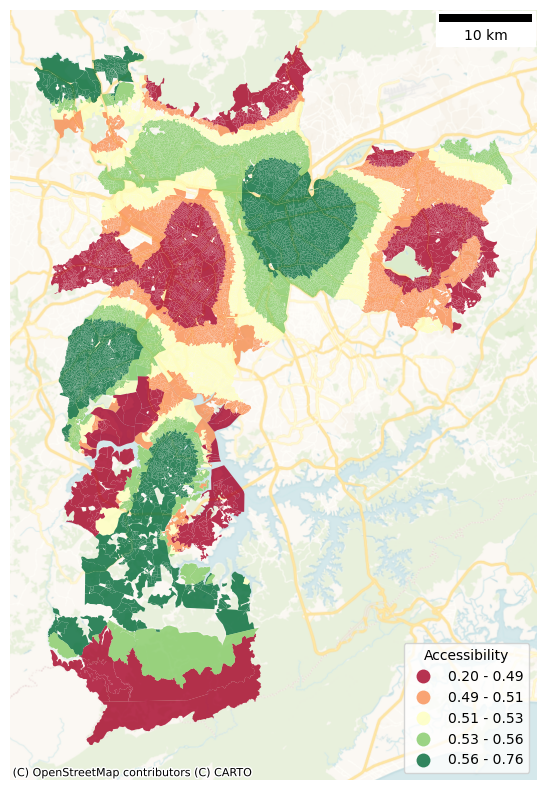

In [87]:
plot("mod_3sfca_n_classes", swap_colors=True)

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


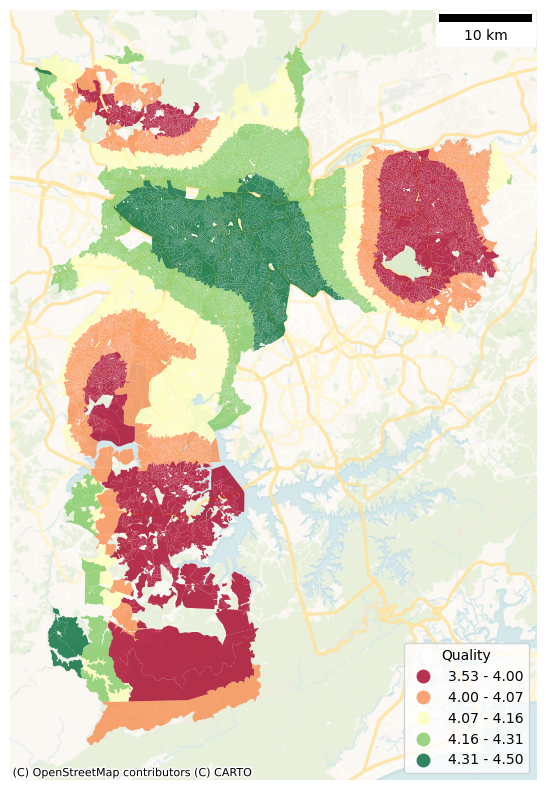

In [91]:
plot("Q_n_classes", swap_colors=True)

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


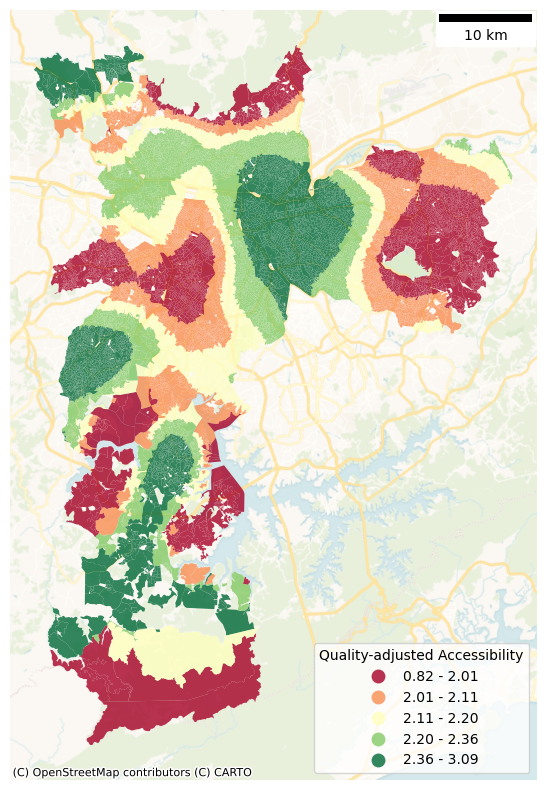

In [86]:
plot("Q_adj_3sfca", swap_colors=True)

In [97]:
subgroup_averages(census_sp, ["fpl_above", "fpl_below"])

fpl_above  fpl_below
Old Access                0.017604   0.017540
Access                    0.528133   0.526212
Quality                   4.146377   4.047101
Quality-Adjusted Access   0.219262   0.214448

In [100]:
subgroup_averages(census_sp, ["n_people_15to17_black", "n_people_15to17_white", "n_people_15to17_indigenous", "n_people_15to17_parda", "n_people_15to17_asian"])

n_people_15to17_black  n_people_15to17_white  \
Old Access                            0.017704               0.017695   
Access                                0.531122               0.530852   
Quality                               4.082387               4.133135   
Quality-Adjusted Access               0.218023               0.220027   

                         n_people_15to17_indigenous  n_people_15to17_parda  \
Old Access                                 0.017973               0.017750   
Access                                     0.539178               0.532508   
Quality                                    4.056038               4.079115   
Quality-Adjusted Access                    0.219369               0.218469   

                         n_people_15to17_asian  
Old Access                            0.017633  
Access                                0.528999  
Quality                               4.199546  
Quality-Adjusted Access               0.221711

In [104]:
# Regression on accessibility metric
import statsmodels.api as sm
import statsmodels.formula.api as smf

# drop rows with missing access values
census_nona_sp = census_sp.dropna(subset=["Q_n_classes", "avg_monthly_earnings"])

y = census_nona_sp["Q_adj_3sfca"]
X = census_nona_sp[["pct_black", "pct_indigenous", "pct_pardos", "pct_asian", "pct_men", "avg_monthly_earnings", "zone_rural", "region_Midwest", "region_Northeast", "region_South", "region_North"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

3sfca_n_classes                    0
e2sfca_n_classes                   0
state                              0
n_households                       0
n_people                           0
avg_monthly_earnings               0
n_people_15to17_white              0
n_people_15to17_black              0
n_people_15to17_asian              0
n_people_15to17_parda              0
n_people_15to17_indigenous         0
n_people_15                        0
n_people_16                        0
n_people_17                        0
n_people_15_men                    0
n_people_16_men                    0
n_people_17_men                    0
n_people_15_women                  0
n_people_16_women                  0
n_people_17_women                  0
n_people_15to17dem                 0
n_people_15to17_alternative        0
state_id                           0
state_abbrev                       0
city_id                            0
city_name                          0
district_id                        0
d

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q_adj_3sfca   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     78.31
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          1.89e-112
Time:                        08:59:05   Log-Likelihood:                 44832.
No. Observations:               18100   AIC:                        -8.965e+04
Df Residuals:                   18092   BIC:                        -8.959e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2273      0.001    315.839      0.000       0.226       0.229
pct_black               -0.0201      0.002     -8.978      0.000      -0.024      -0.016
pct_indigenous          -0.0087      0.009     -0.953      0.341      -0.027       0.009
pct_pardos              -0.0121      0.001    -14.012      0.000      -0.014      -0.010
pct_asian                0.0031      0.003      1.091      0.275      -0.003       0.009
pct_men                  0.0008      0.001      0.693      0.489      -0.001       0.003
avg_monthly_earnings -1.547e-06   7.12e-08    -21.710      0.000   -1.69e-06   -1.41e-06
zone_rural              -0.0059      0.001     -5.353      0.000      -0.008      -0.004
region_Midwest                0          0        nan        nan           0           0
region_Northeast              0          0        nan        nan           0           0
region_South                  0          0        nan        nan           0           0
region_North                  0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1480.590   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2113.997
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       4.005   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Map Brazil cities


In [41]:
# Download cities geometries from geobr
import geobr
cities_geom = geobr.read_municipality(code_muni = "all", year = 2010, simplified = True)

In [42]:
cities_geom.head()

code_muni              name_muni  code_state abbrev_state  \
0  1100015.0  Alta Floresta D'oeste        11.0           RO   
1  1100023.0              Ariquemes        11.0           RO   
2  1100031.0                 Cabixi        11.0           RO   
3  1100049.0                 Cacoal        11.0           RO   
4  1100056.0             Cerejeiras        11.0           RO   

                                            geometry  
0  MULTIPOLYGON (((-62.24620 -11.90149, -62.24151...  
1  MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ...  
2  MULTIPOLYGON (((-60.52408 -13.32137, -60.37161...  
3  MULTIPOLYGON (((-61.42679 -11.11376, -61.42900...  
4  MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...

In [43]:
#  average of accessibility metrics for each city in Brazil, weighted by population of census tract
#wm = lambda x: np.naaverage(x, weights=census.loc[x.index, "n_people"])
wm = lambda x: np.nansum(x*census.loc[x.index, "n_people"],axis=0)/((~np.isnan(x))*census.loc[x.index, "n_people"]).sum(axis=0)
census_cities = census.groupby(["city_id"]).agg({"n_people": "sum", "Q_n_classes": wm, "Q_adj_3sfca": wm, "mod_3sfca_n_classes": wm}).reset_index()

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_26818/117622489.py:3: RuntimeWarning: invalid value encountered in double_scalars
  wm = lambda x: np.nansum(x*census.loc[x.index, "n_people"],axis=0)/((~np.isnan(x))*census.loc[x.index, "n_people"]).sum(axis=0)


In [44]:
# merge with cities geometries
cities = cities_geom.merge(census_cities, left_on="code_muni", right_on="city_id")

# Set EPSG:5641 crs
cities = cities.to_crs(epsg=5641)



In [45]:
cities.head()


code_muni              name_muni  code_state abbrev_state  \
0  1100015.0  Alta Floresta D'oeste        11.0           RO   
1  1100023.0              Ariquemes        11.0           RO   
2  1100031.0                 Cabixi        11.0           RO   
3  1100049.0                 Cacoal        11.0           RO   
4  1100056.0             Cerejeiras        11.0           RO   

                                            geometry    city_id  n_people  \
0  MULTIPOLYGON (((2858819.227 8675108.989, 28593...  1100015.0   24057.0   
1  MULTIPOLYGON (((2759702.431 8913417.611, 27649...  1100023.0   89705.0   
2  MULTIPOLYGON (((3050408.773 8514266.499, 30673...  1100031.0    6304.0   
3  MULTIPOLYGON (((2949980.606 8763969.294, 29497...  1100049.0   78150.0   
4  MULTIPOLYGON (((2951461.764 8524171.362, 29500...  1100056.0   16765.0   

   Q_n_classes  Q_adj_3sfca  mod_3sfca_n_classes  
0     4.505933     0.179197             0.039592  
1     4.178268     0.117220             0.028038  
2     4.000000     0.105789             0.026447  
3     4.319624     0.117012             0.026775  
4     4.600000     0.086433             0.018790

In [63]:
# Download states from grobr
states_geom = geobr.read_state(code_state = "all", year = 2010, simplified = True)
states_geom.to_crs(epsg=5641, inplace=True)

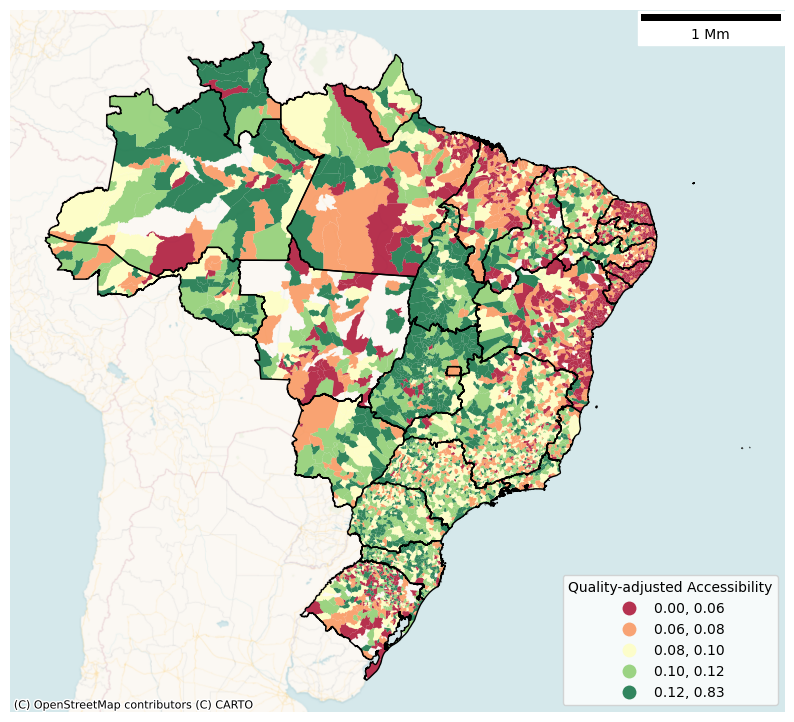

In [66]:
plot("Q_adj_3sfca", df = cities, swap_colors=True, edges=states_geom)

<AxesSubplot:>

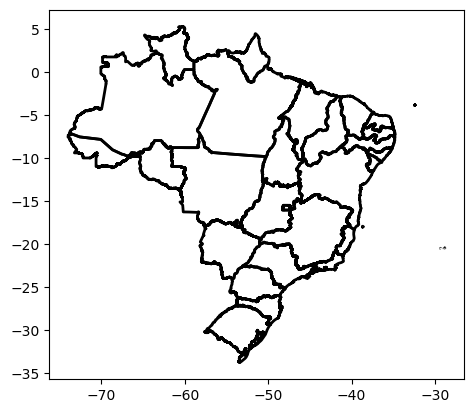

In [62]:
states_geom.boundary.plot(edgecolor="black", linewidth=2, color = None)